In [10]:
from IPython.display import Javascript

Javascript("""let timerId = setInterval(() => Jupyter.notebook.execute_cells([1]), 60000);
setTimeout(() => { clearInterval(timerId); alert('ATTENTION! fin de cession. Sauvegardez votre travail.'); },7200000);
    IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');

        }
    );""")

<IPython.core.display.Javascript object>

In [19]:
A = 2+3

<h1 style='text-align:center; width:900px;'>  TP réfraction </h1>

Regardez la vidéo d'expérience ci-dessous.

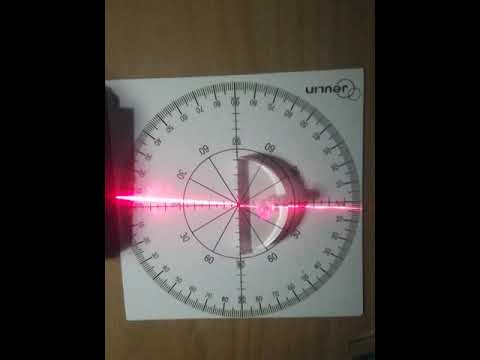

In [12]:
from IPython.display import YouTubeVideo

YouTubeVideo('2lboRG60DoA', width=900, height=500)


Cette expérience est reproduite dans la simulaton ci-dessous. Attention, dans la vidéo le changement de milieu se fait de gauche à droite alors que dans la simulation elle se fait de haut en bas.

Ce que vous avez à faire:
* Si vous êtes en salle de TP, utilisez le matériel mis à votre disposition afin de réaliser cette expérience, si vous êtes à la maison, utilisez la simulation
* Relevez des valeurs d'angle d'incidence et d'angle de réfraction correspondant sur votre feuille. Il faudra au moins 6 couples de valeurs différentes bien réparties entre 0 et 90°.
* Une fois terminé, cliquez sur "exploiter" afin de modéliser vos données en python
* Suivez les consignes du document de modélisation afin de le rendre à l'enseignant 

In [13]:
from math import cos,pi,sin,asin
from ipywidgets import widgets
from ipywidgets.widgets import FloatSlider, Layout, Button, HBox, VBox
from IPython.display import display
import ipyvuetify as v
from bqplot import *

# parametres de la simulation
n1 = 1.
n2 = 1.33

# actions lorsque lors des événemets sur le slider
def augmente(a,b,c):
    temp = test.v_model
    temp += test.step
    test.v_model = temp
    setparam()

def diminue(a,b,c):
    temp = test.v_model
    temp -= test.step
    test.v_model = temp
    setparam()
    
def maj_slider(a,b,c):
    setparam()
    
    
# slider    
test = v.Slider(v_model = 45, min = 0, max = 90, step = 0.1, append_icon = 'mdi-plus', prepend_icon = 'mdi-minus')
test.on_event("end",maj_slider)
test.on_event("click",maj_slider)
test.on_event("click:append",augmente)
test.on_event("click:prepend",diminue)
test.layout.height='150px'
test.layout.width = '900px'

# 3 figures
x_inc = [0,0]
y_inc = [0,0]
x_refr = [[1,1],[2,2]]
y_refr = [[-1,1],[-1,1]]
x_refl = []
y_refl = []
x_regle = [[i,i] for i in range(0,91)]
y_regle = [[0,1] for i in range(0,91)]
i1_x = [45,45]
i1_y = [0,2]
i2_x = [39,39]
i2_y = [0,2]
vect_lum = [0,1]
vect_perp = [-1,0]

# ajustement des paramètres des figures
def setparam():
    global n1,n2
    i1 = test.v_model
    imin = 5*int(i1/5)-5
    R1=1/cos(i1*pi/180)
    x1=-R1*sin(i1*pi/180)
    vect_lum = [-x1/(1+x1**2)**0.5,-1/(1+x1**2)**0.5]
    vect_perp = [-vect_lum[1],vect_lum[0]]         
    x_sc_regle1.min=imin
    x_sc_regle1.max=imin+10
    if -1<= n1/n2*sin(i1*pi/180) <= 1:
        i2 = 180/pi*asin(n1/n2*sin(i1*pi/180))
        imin2 = 5*int(i2/5)-5
        R2=-1/cos(i2*pi/180)
        x2=abs(R2*sin(i2*pi/180))
        x_inc = [x1,0,x2]
        y_inc = [1,0,-1]
        

        line.x = x_inc
        line.y = y_inc
        x_refl = [0,-x1]
        y_refl = [0,1]
        line_refl.x = x_refl
        line_refl.y = y_refl
        i1_x = [i1,i1]
        i2_x = [i2,i2]
        line_inc.x=i1_x
        i2_y = [0,2]
        line_refr.y=i2_y
        line_refr.x=i2_x
        rt = False
        x_sc_regle2.min=imin2
        x_sc_regle2.max=imin2+10
    else:
        x_inc = [x1,0,-x1]
        y_inc = [1,0,1]
        line.x = x_inc
        line.y = y_inc
        x_refl = [0,-x1]
        y_refl = [0,1]
        line_refl.x = x_refl
        line_refl.y = y_refl
        i1_x = [i1,i1]
        i2_x = []
        i2_y = []
        line_refr.y=i2_y
        line_inc.x=i1_x
        line_refr.x=i2_x
    sens.x = [-0.5*vect_lum[0],-0.55*vect_lum[0]+0.05*vect_perp[0],-0.5*vect_lum[0],-0.55*vect_lum[0]-0.05*vect_perp[0]],
    sens.y = [-0.5*vect_lum[1],-0.55*vect_lum[1]+0.05*vect_perp[1],-0.5*vect_lum[1],-0.55*vect_lum[1]-0.05*vect_perp[1]],
    
        


x_sc = LinearScale(min=-1,max=1)
y_sc = LinearScale(min=-1,max=1)
x_sc_regle1 = LinearScale()
y_sc_regle1 = LinearScale(min=0.1,max=3)
x_sc_regle2 = LinearScale()
y_sc_regle2 = LinearScale(min=0.1,max=3)

ax_x = Axis(label='', visible=False, scale=x_sc, tick_format='0.0f')
ax_y = Axis(label='', visible=False, scale=y_sc,
            orientation='vertical', tick_format='0.0f')
ax_xregle1 = Axis(label="angle d'incidence i1", scale=x_sc_regle1, tick_format='d',num_ticks=3,color="black",grid_lines='none')
ax_yregle1 = Axis(label='', visible=False, scale=y_sc_regle1,
            orientation='vertical', tick_format='d')
ax_xregle2 = Axis(label="angle de réfraction i2", scale=x_sc_regle2, tick_format='d',num_ticks=3,color="black",grid_lines='none')
ax_yregle2 = Axis(label='', visible=False, scale=y_sc_regle2,
            orientation='vertical', tick_format='d')

# figure principale
line = Lines(x=x_inc,
             y=y_inc,
             scales={'x': x_sc, 'y': y_sc},
             colors=['red'])
sens = Lines(x=x_inc,
             y=y_inc,
             scales={'x': x_sc, 'y': y_sc},
             colors=['red'])
line_refl = Lines(x=x_refl,
             y=y_refl,
             scales={'x': x_sc, 'y': y_sc},
             colors=['red'],
             line_style='dashed')
line_axes = Lines(x=[-1,1], y = [0,0], scales={'x':x_sc, 'y':y_sc},colors=['black'])
line_axes2 = Lines(x=[0,0], y = [-1,1], scales={'x':x_sc, 'y':y_sc},colors=['black'],line_style='dashed')
angles = Label(x = [0.45,0.52,0.5], y = [0.55, 0.55,0.45], text =  ["i1","r","i2"],colors=['blue'])
fig = Figure(axes=[ax_x, ax_y], marks=[line_axes,line_axes2,line,sens,line_refl,angles])
fig.layout.height = '580px'

# graduations angle d'incidence
line2 = Lines(x=x_regle,
             y=y_regle,
             scales={'x': x_sc_regle1, 'y': y_sc_regle1},
             colors=['black'],stroke_width=2)
line_inc = Lines(x = i1_x, y= i1_y, scales={'x': x_sc_regle1, 'y': y_sc_regle1},
             colors=['red'], stroke_width=5)

fig2 = Figure(axes=[ax_xregle1, ax_yregle1], marks=[line_inc, line2],linewidth=[4,2])
fig2.layout.height = '280px'

# graduations angle de réfraction
line3 = Lines(x=x_regle,
             y=y_regle,
             scales={'x': x_sc_regle2, 'y': y_sc_regle2},
             colors=['black'],stroke_width=2)
line_refr = Lines(x = i2_x, y= i2_y, scales={'x': x_sc_regle2, 'y': y_sc_regle2},
             colors=['red'], stroke_width=10)

fig3 = Figure(axes=[ax_xregle2, ax_yregle2], marks=[line_refr, line3],linewidth=[8,2])
fig3.layout.height = '280px'

# affichage des différents objets
display(VBox([HBox([VBox([fig2,fig3],layout = Layout(align_content = 'stretch', justify_content = 'center',height = '600px',min_width='300px',width = '300px')),
                         fig],layout = Layout(align_content = 'stretch',align_items='stretch',height='600px',min_width='600px',width='900px')),test],
             layout = Layout(align_content = 'stretch',align_items='stretch',height='800px',justify_content='center')))


# une première mise à jour à l'initialisation
setparam()




<a href="../notebooks/exploitation.ipynb" > Exploiter </a>